<a href="https://colab.research.google.com/github/yeesem/Natural-Laguage-Processing/blob/main/Chat_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [348]:
import pickle
import numpy as np

In [349]:
with open("train_qa.txt",'rb') as f:
  train_data = pickle.load(f)

In [350]:
with open("test_qa.txt","rb") as f:
  test_data = pickle.load(f)

In [351]:
type(test_data)

list

In [352]:
type(train_data)

list

In [353]:
len(train_data)

10000

In [354]:
len(test_data)

1000

In [355]:
#Story,Question,Ans
print(train_data[0])

print("\n")

#Story
print(train_data[0][0])

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']


In [356]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [357]:
all_data = test_data + train_data

In [358]:
len(all_data)

11000

In [359]:
test = ["I","am","John","I"]
set1 = set(test)
test2 = ["I","am","Peter","I"]
set1.union(test2)

{'I', 'John', 'Peter', 'am'}

In [360]:
#Set vocab as empty set
vocab = set()

#Set - Only Return unique word
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [361]:
vocab.add('no')

In [362]:
vocab.add('yes')

In [363]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [364]:
vocab_len = len(vocab) + 1

In [365]:
vocab_len

38

In [366]:
#Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [367]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [368]:
max_story_len = max(all_story_lens)
max_story_len

156

In [369]:
max_question_len = max([len(data[1]) for data in all_data])
print(max_question_len)

6


In [370]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [371]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [372]:
tokenizer.word_index.items()

print(tokenizer.word_index["down"])
print("\n")

for i,(word,count) in enumerate(tokenizer.word_index.items()):
  print(f"{word:<10}: {count}")
  if(i==9):
    break

1


down      : 1
there     : 2
.         : 3
in        : 4
kitchen   : 5
football  : 6
yes       : 7
the       : 8
milk      : 9
got       : 10


In [373]:
train_story_text = []
train_question_text = []
train_ans = []

In [374]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_ans.append(answer)

In [375]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [376]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [377]:
len(train_story_seq)

10000

In [378]:
train_story_seq[:3]

[[11, 20, 16, 8, 26, 3, 33, 32, 16, 8, 27, 3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3,
  33,
  13,
  16,
  8,
  5,
  3,
  17,
  13,
  19,
  16,
  8,
  26,
  3]]

In [379]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_ques_len = max_question_len):

  #STORIES = X
  X = []
  #QUESTION
  Xq = []
  #Y CORRECT ANS (yes/no)
  Y = []

  for story,question,answer in data:

    #for each story
    #[23,14,...]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]

    y = np.zeros(len(word_index) + 1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  #pad_sequences - make all the question and stories in the same length
  return (pad_sequences(X,maxlen = max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [380]:
input_train,question_train,answer_train = vectorize_stories(train_data)

In [381]:
input_test,question_test,answer_test = vectorize_stories(test_data)

In [382]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [383]:
input_test

array([[ 0,  0,  0, ...,  8, 27,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       ...,
       [ 0,  0,  0, ...,  8, 24,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ..., 24,  2,  3]], dtype=int32)

In [384]:
tokenizer.word_index['yes']

7

In [385]:
tokenizer.word_index['no']

25

In [386]:
yes = 0
no = 0

for i in range (len(test_data)):
  if train_data[i][2] == 'no':
    no+=1
  else:
    yes+=1

print(yes)
print(no)


508
492


In [387]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [388]:
from keras.models import Sequential,Model

In [389]:
from tensorflow.keras.layers import Embedding

In [390]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate

In [391]:
#PLACEHOLDER shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [392]:
vocab_size = len(vocab) + 1

In [393]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size,output_dim = 64))
#Dropout = 0.5, 50% of neuron wil be turned off during the training
#Help in preventing overfitting
input_encoder_m.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,embedding_dim)

In [394]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,max_question_len)

In [395]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim = 64,input_length = max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,question_maxlen,embedding_dim)

In [396]:
#ENCODED ---> ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [397]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation('softmax')(match)

In [398]:
 response = add([match,input_encoded_c])
 response = Permute((2,1))(response)

In [399]:
answer = concatenate([response,question_encoded])

In [400]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_2')>

In [401]:
from keras.layers import LSTM
answer = LSTM(32)(answer)

In [402]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [403]:
answer = Activation('softmax')(answer)

In [404]:
model = Model([input_sequence,question],answer)

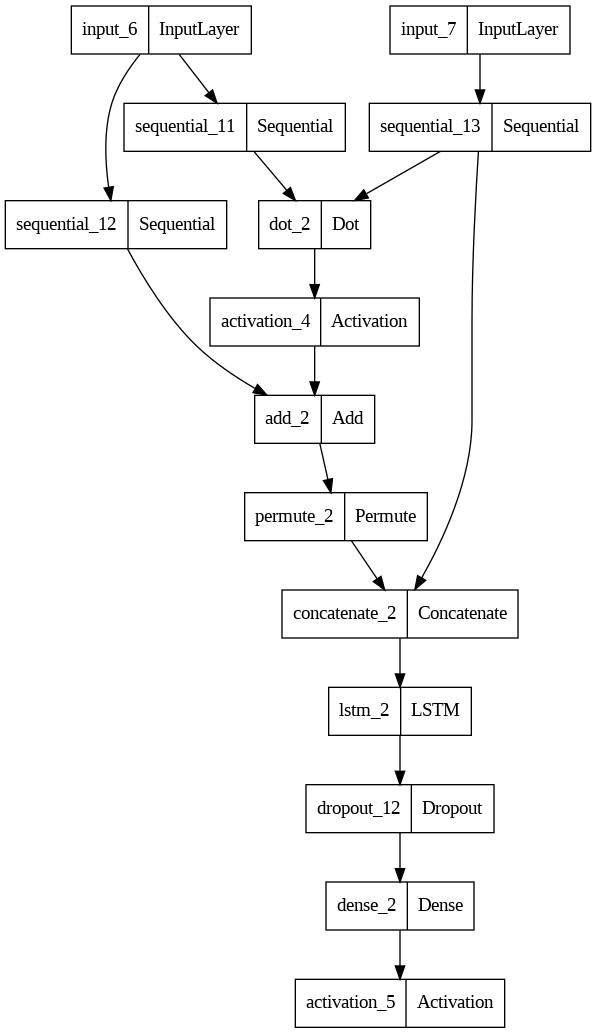

In [405]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [406]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy')

In [407]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_11 (Sequential)  (None, None, 64)             2432      ['input_6[0][0]']             
                                                                                                  
 sequential_13 (Sequential)  (None, 6, 64)                2432      ['input_7[0][0]']             
                                                                                            

In [408]:
history = model.fit(
    [input_train,question_train],
    answer_train,
    batch_size = 32,
    epochs = 100,
    validation_data = ([input_test,question_test],answer_test)
)

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.9135 - val_loss: 0.6948
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.7080 - val_loss: 0.6939
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6978 - val_loss: 0.6932
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6967 - val_loss: 0.6932
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6965 - val_loss: 0.6950
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6953 - val_loss: 0.6934
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6956 - val_loss: 0.6941
Epoch 8/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6952 - val_loss: 0.6932
Epoch 9/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6950 - val_loss: 0.6935
Epoch 10/100
313/313 [==============================] - 4s 13ms/step - loss: 0.695

dict_keys(['loss', 'val_loss'])


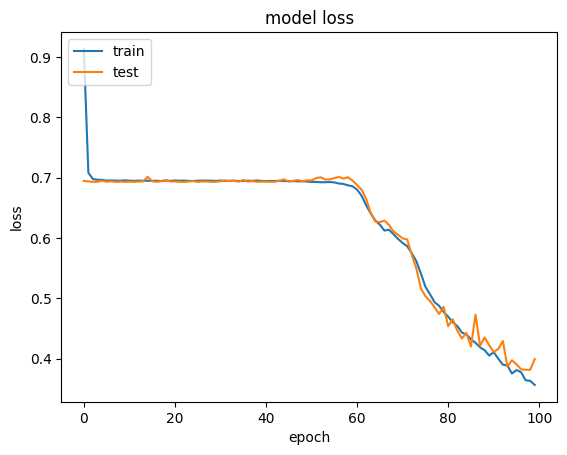

In [409]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

#Summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()

In [ ]:
#Summarize history for accuracy
# plt.plot(history.history["accuracy"])
# plt.plot(history.history['val_accuracy'])
# plt.title("model accuracy")
# plt.ylabel("accuracy")
# plt.xlabel("epoch")
# plt.legend(["train","test"],loc = "upper left")
# plt.show()

In [413]:
model.save("chatbox_model")

In [414]:
pred_results = model.predict([input_test,question_test])

32/32 [==============================] - 1s 3ms/step


In [415]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [416]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [417]:
pred_results.shape

(1000, 38)

In [418]:
pred_results

array([[8.92271945e-09, 8.86064822e-09, 1.03710089e-08, ...,
        7.68841879e-09, 8.54080895e-09, 1.00090523e-08],
       [1.50422022e-08, 1.65713114e-08, 2.49802330e-08, ...,
        1.59568554e-08, 1.36046951e-08, 1.60568110e-08],
       [3.93319297e-08, 2.10655973e-08, 3.73416427e-08, ...,
        3.53272576e-08, 4.32889813e-08, 2.91666904e-08],
       ...,
       [3.49119889e-09, 3.25678795e-09, 4.12542356e-09, ...,
        4.54171545e-09, 3.60517616e-09, 4.41893233e-09],
       [9.77192300e-08, 1.01049686e-07, 1.36964786e-07, ...,
        8.88659883e-08, 9.50995585e-08, 1.03727558e-07],
       [5.37609992e-07, 4.36419924e-07, 4.98785710e-07, ...,
        5.69868064e-07, 5.58230056e-07, 5.31697481e-07]], dtype=float32)

In [419]:
pred_results[0]

array([8.92271945e-09, 8.86064822e-09, 1.03710089e-08, 8.16790457e-09,
       9.97436800e-09, 6.29738128e-09, 8.34160918e-09, 1.47390610e-03,
       1.03389146e-08, 8.17482437e-09, 5.46506440e-09, 8.09738854e-09,
       7.30620453e-09, 1.12583756e-08, 9.15271503e-09, 1.02153255e-08,
       1.04012194e-08, 9.08919873e-09, 8.17507395e-09, 6.94431757e-09,
       7.42182715e-09, 9.57638857e-09, 1.01682236e-08, 9.12350284e-09,
       7.05302838e-09, 9.98525798e-01, 8.87199469e-09, 8.69883543e-09,
       7.85170151e-09, 8.60165805e-09, 5.90580829e-09, 1.19108261e-08,
       1.11986225e-08, 1.01374917e-08, 9.89633175e-09, 7.68841879e-09,
       8.54080895e-09, 1.00090523e-08], dtype=float32)

In [420]:
" ".join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [421]:
" ".join(test_data[0][1])

'Is John in the kitchen ?'

In [422]:
test_data[0][2]

'no'

In [423]:
val_max = np.argmax(pred_results[0])

In [424]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [425]:
k

'no'

In [426]:
#Return the probability
pred_results[0][val_max]

0.9985258

In [427]:
#Only can use the vocab that we have trained
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [428]:
my_story = "John left kitchen . Sandra dropped the football in the garden ."

In [429]:
my_story.split()

['John',
 'left',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [430]:
my_ques = "Is the football in the garden ."

In [431]:
my_ques.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '.']

In [432]:
mydata = [(my_story.split(),my_ques.split(),'yes')]

In [433]:
#Same format as my train and test data
mydata

[(['John',
   'left',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '.'],
  'yes')]

In [434]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [435]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        21, 18,  5,  3, 33, 29,  8,  6,  4,  8, 30,  3]], dtype=int32)

In [436]:
my_ques

array([[ 8,  6,  4,  8, 30,  3]], dtype=int32)

In [437]:
pred_results = model.predict([my_story,my_ques])

1/1 [==============================] - 0s 24ms/step


In [438]:
val_max = np.argmax(pred_results[0])

In [439]:
val_max

7

In [440]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [441]:
#The ans is yes
k

'yes'

In [442]:
pred_results[0][val_max]

0.9856494

In [443]:
def chat_box(story,ques,ans):
  k = "null"

  mydata = [(story.split(),ques.split(),ans)]
  my_story,my_ques,my_ans = vectorize_stories(mydata)

  pred_results = model.predict([my_story,my_ques])
  val_max = np.argmax(pred_results[0])

  for key,val in tokenizer.word_index.items():
    if val == val_max:
      k = key

  print(k," ",pred_results[0][val_max])

In [444]:
story = "john dropped football in garden . john left ."
ques = "Is the football in the kitchen"
ans = 'no'

chat_box(story,ques,ans)

1/1 [==============================] - 0s 23ms/step
no   0.7176984


In [445]:
story = "john dropped football in garden . john left ."
ques = "Is the football in the garden ."
ans = 'yes'

chat_box(story,ques,ans)

1/1 [==============================] - 0s 26ms/step
yes   0.89946544
